# Module 7 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
from nose.tools import assert_equal, assert_almost_equal
from nose.tools import assert_equal, assert_is_instance, assert_is_not
%matplotlib inline

In the following problems we will use the dow jones index data

In [2]:
df = pd.read_csv('dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


# Problem 1: Creating a Scatter Plot

Write a function called `scatter_plot` that takes in a stock name, and two other column names from the dow jones index data and plots a scatter plot of the two columns.

For example, the function would be able to take in `'AA'`, `'open'`, and `'close'` as inputs, and it would plot the scatter plot of `'open'` and `'close'` for the `'AA'` stock.

Furthermore:

1. Give the x-axis the same label as the column name inputted for `x_data`.

2. Give the y-axis the same label as the column name inputted for `y_data`.

In [3]:
# stock_name = "AA"

# # Filter the data for the given stock name
# stock_data = df[df['stock'] == stock_name]
# stock_data.head()

In [4]:
# x_data = 'open'
# y_data = 'close'

# # Extract the specified columns
# x = stock_data[x_data]
# y = stock_data[y_data]

In [5]:
# x.head(), y.head()

In [6]:
# Create the scatter plot
# plt.scatter(x, y)
# plt.xlabel(x_data)
# plt.ylabel(y_data)
# plt.title(f"Scatter Plot: {stock_name}")
# plt.show()

In [3]:
def scatter_plot(df,stock_name,x_data,y_data):
    """
    Inputs
    ------
    df: a pandas dataframe, the dataframe containing the relevant data
    
    stock_name: a string, the name of the stock
    
    x_data: a string, the name of the first column to be used
    
    y_data: a string, the name of the second column to be used
    
    Output
    ------
    
    ax: a matplotlib.axes object
    
    """
    
    ### YOUR CODE HERE
    
    # Filter the dataframe for the given stock name
    stock_data = df[df['stock'] == stock_name]

    # Extract the specified columns
    x = stock_data[x_data]
    y = stock_data[y_data]

    # Create the scatter plot
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_data)
    ax.set_ylabel(y_data)
    #ax.set_title(f"Scatter Plot: {stock_name}")
    
    return ax

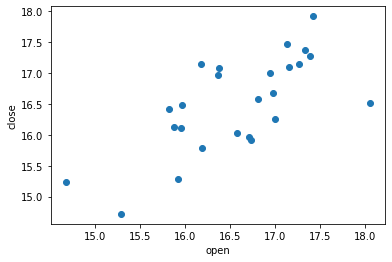

In [4]:
my_plot = scatter_plot(df, 'AA', 'open', 'close')

In [5]:
assert_equal(my_plot.get_xlabel(), 'open')
assert_equal(my_plot.get_ylabel(), 'close')
assert_almost_equal(my_plot.collections[0].get_offsets()[0][0], 15.82)
assert_equal(len(my_plot.collections[0].get_offsets()), 25)

In [6]:
df_mat = df.values  # convert pandas to numpy multi dim array
print(df_mat[:5])

[[1 'AA' '1/7/2011' 15.82 16.72 15.78 16.42 239655616 3.79267 nan nan
  16.71 15.97 -4.42849 26 0.182704]
 [1 'AA' '1/14/2011' 16.71 16.71 15.64 15.97 242963398 -4.42849
  1.380223028 239655616.0 16.19 15.79 -2.47066 19 0.187852]
 [1 'AA' '1/21/2011' 16.19 16.38 15.6 15.79 138428495 -2.47066
  -43.02495926 242963398.0 15.87 16.13 1.63831 12 0.189994]
 [1 'AA' '1/28/2011' 15.87 16.63 15.82 16.13 151379173 1.63831
  9.355500109 138428495.0 16.18 17.14 5.93325 5 0.185989]
 [1 'AA' '2/4/2011' 16.18 17.39 16.18 17.14 154387761 5.93325 1.987451735
  151379173.0 17.33 17.37 0.230814 97 0.175029]]


# Problem 2: Correlation of Columns

In this problem you will finish writing the correlation function. The correlation function has the following parameters: `df_mat` a multidimensional array and `col1` and `col2` integer indices used to index `df_mat`. 

Your task is do the following:
- Get `col1` and `col2` from `df_mat`.
- Plot `col1` and `col2` from `df_mat` using the `scatter` function from pyplot.
    - Your plot should have a title and labels for the x and y axis.
- Compute the Pearson and Spearman correlations of `col1` and `col2`.
- Lastly, your function should return:  
    - the `axes` object (we have created this for you)
    - Pearson correlation
    - Spearman correlation   

In [7]:
col1, col2 = 6, 7

In [8]:
#df_mat[:, col1][:5]

In [9]:
#df_mat[:, col2][:5]

In [10]:
# Get col1 and col2 from df_mat
x = df_mat[:, col1]
y = df_mat[:, col2]

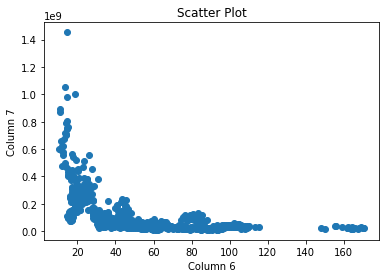

In [11]:
# Plot col1 and col2 using scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel(f'Column {col1}')
ax.set_ylabel(f'Column {col2}')
ax.set_title('Scatter Plot')
plt.show()

In [12]:
# Compute Pearson and Spearman correlations

#pearson_corr, _ = st.pearsonr(x, y)
#spearman_corr, _ = st.spearmanr(x, y)

pearson_corr, spearman_corr = st.pearsonr(x, y), st.spearmanr(x, y)

In [13]:
pearson_corr, spearman_corr

((-0.5145452542735407, 6.266471906086997e-52),
 SpearmanrResult(correlation=-0.7773913236282967, pvalue=9.406534933863516e-153))

In [15]:
pearson_corr[0]

6.266471906086997e-52

In [16]:
def correlation(df_mat, col1, col2):
    
    ### YOUR CODE HERE
    
    # Get col1 and col2 from df_mat
    x = df_mat[:, col1]
    y = df_mat[:, col2]
    
    
    # Plot col1 and col2 using scatter plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(x, y)
    ax.set_xlabel(f'Column {col1}')
    ax.set_ylabel(f'Column {col2}')
    ax.set_title('Scatter Plot')
    
    # Compute Pearson and Spearman correlations
    # pearson_corr, _ = st.pearsonr(x, y)
    # spearman_corr, _ = st.spearmanr(x, y)
    
    pearson_corr, spearman_corr = st.pearsonr(x, y), st.spearmanr(x, y)
    
    # Return axes object, Pearson correlation, and Spearman correlation
    return ax, pearson_corr, spearman_corr


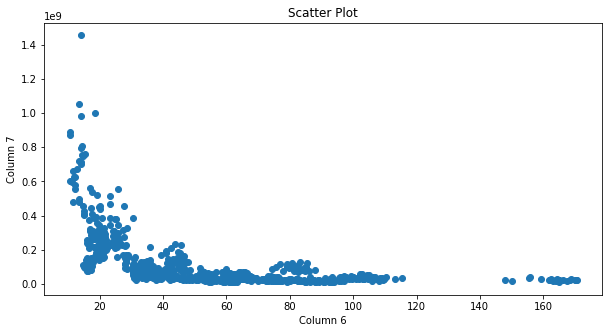

In [17]:
ax, pc, sc = correlation(df_mat, col1, col2)

In [18]:
ax

<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='Column 6', ylabel='Column 7'>

In [19]:
pc

(-0.5145452542735407, 6.266471906086997e-52)

In [20]:
sc

SpearmanrResult(correlation=-0.7773913236282967, pvalue=9.406534933863516e-153)

Pearson Correlation: -0.5145452542735407
Spearman Correlation: -0.7773913236282967


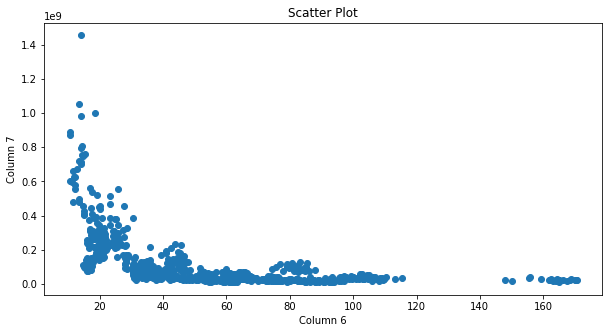

In [22]:
from helper import c

col1, col2 = 6, 7
sol = c(df_mat, col1, col2)

ax, pc, sc = correlation(df_mat, col1, col2)
data = ax.collections[0].get_offsets()
print('Pearson Correlation: {0}'.format(pc[0]))
print('Spearman Correlation: {0}'.format(sc[0]))
assert_is_instance(ax, mpl.axes.Axes, msg='Return a Axes object.')  
assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

assert_equal(np.array_equal(data[:,0], sol[0]), True, msg="Data on for the x axis is not correct")
assert_equal(np.array_equal(data[:,1], sol[1]), True, msg="Data on for the y axis is not correct")

assert_almost_equal(pc[0], sol[2][0])
assert_almost_equal(sc[0], sol[3][0])

# Problem 3: Fitting OLS Model to Data

Your task is to finish writing the `reg_plot` function. Your task is to fit an OLS model to 2 columns of data. `reg_plot` takes in the following parameters:

- a **dataframe** (not numpy multidimensional array), 
- `x` and `y`, which are strings that specify the name of a column in the DataFrame. 

Use the `regplot` function from the Seaborn library to fit an ols model to the data. Your plot should contain a label for the x and y axis and also a title.

In [23]:
def reg_plot(df, x, y):
    '''
    df dataframe
    
    x: column name
    
    y: column name
    '''
    
    ### YOUR CODE HERE
    ax = sns.regplot(x=x, y=y, data=df, fit_reg=True, ci=68)
    ax.set_xlabel(x, fontsize=18)
    ax.set_ylabel(y, fontsize=18)
    ax.set_title('Scatter Plot w/ Linear Fit', fontsize=18)
    
    
    return ax

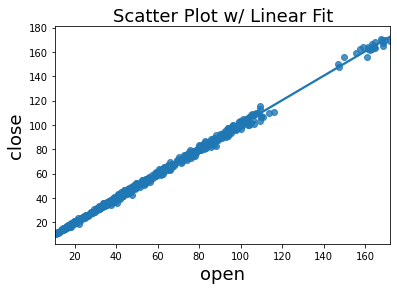

In [24]:
reg_plot(df, x='open', y='close')
plt.show()

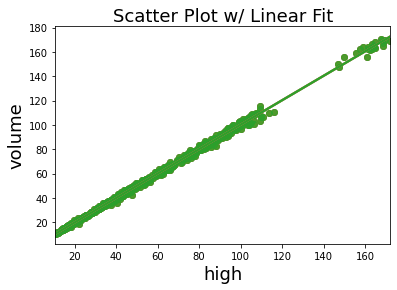

In [25]:
ax = reg_plot(df, x='open', y='close')
from helper import rp
sol_x, sol_y = rp(df)
assert_is_instance(ax, mpl.axes.Axes, msg='Return a Axes object.')  
assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")
assert_equal(np.array_equal(ax.lines[0].get_ydata(), sol_y), True, msg="Data on Y-Axis is incorrect")
assert_equal(np.array_equal(ax.lines[0].get_xdata(), sol_x), True, msg="Data on x-axis is incorrect")
sol_x, sol_y = rp(df, 'high', 'volume')
assert_is_instance(ax, mpl.axes.Axes, msg='Return a Axes object.')  
assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")
assert_equal(np.array_equal(ax.lines[0].get_ydata(), sol_y), True, msg="Data on x axis is incorrect")
assert_equal(np.array_equal(ax.lines[0].get_xdata(), sol_x), True, msg="Data on y axis is incorrect")

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 